In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
doc = pd.read_csv('./datasets_20y/dataset.csv')
time = doc['datetime'].values

doc = doc.drop(columns= ['datetime', 'logHp60'])

data = doc.values
column_names = doc.columns
# print(data)

data_reshaped = list(zip(*data))

In [4]:
plotted_data = [[], []]
hp60 = doc['Hp60'].values
for i in range(0, len(hp60), 24):
    plotted_data[0].append(time[i])
    plotted_data[1].append(hp60[i])
print(len(plotted_data[0]))

7671


Text(0.5, 1.0, 'Hp60')

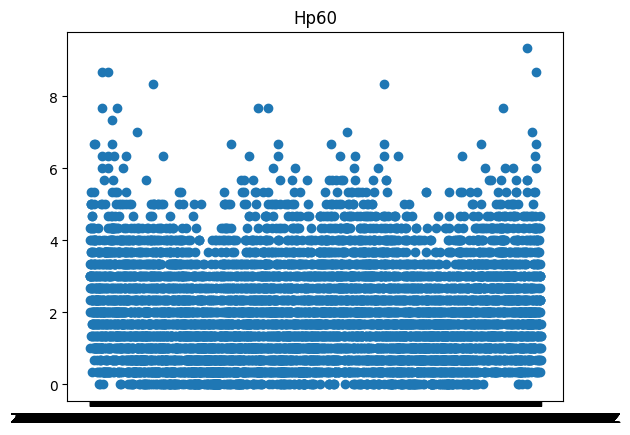

In [5]:
plt.scatter(plotted_data[0], plotted_data[1])
plt.title('Hp60')

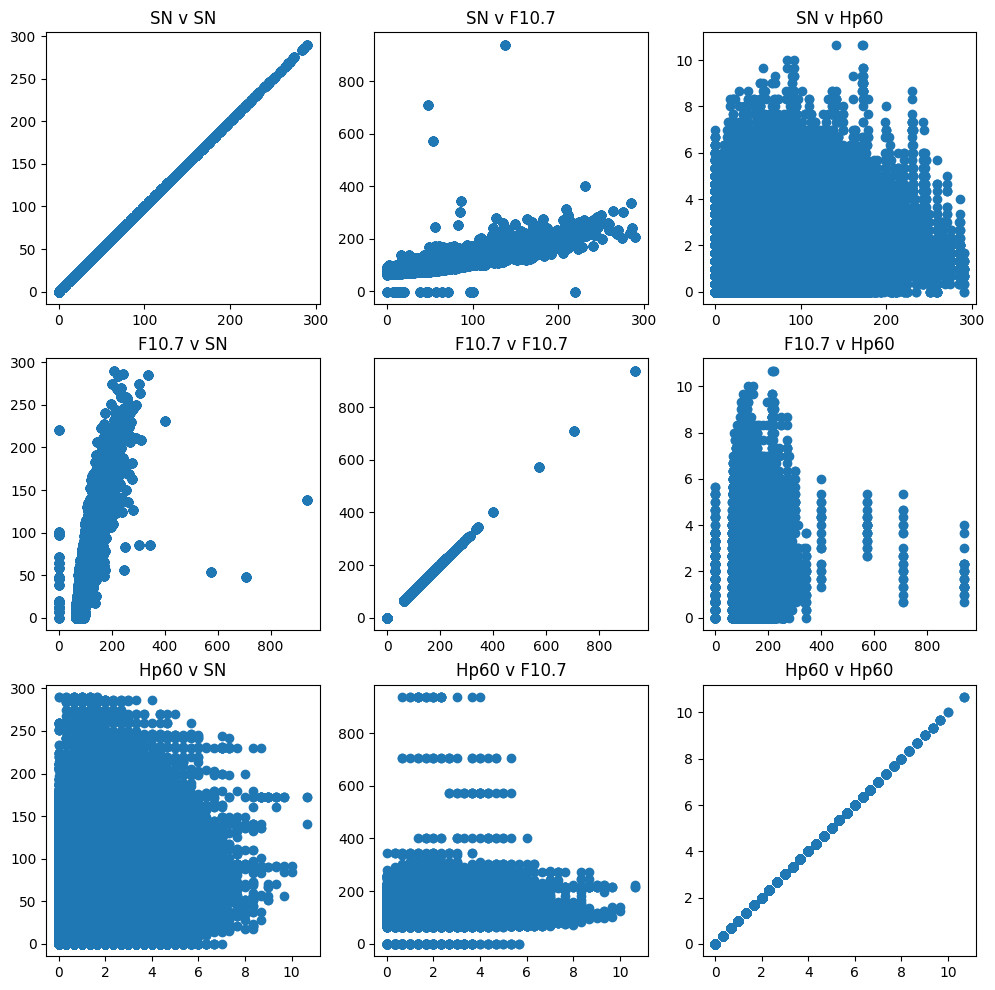

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i_ls, ls in enumerate(data_reshaped):
    for j_ls2, ls2 in enumerate(data_reshaped):
        ax[i_ls][j_ls2].set_title(f'{column_names[i_ls]} v {column_names[j_ls2]}')
        ax[i_ls][j_ls2].scatter(ls, ls2)
        
    
# ax[0].set_title('test')

# ax[]

Index(['datetime', 'SN', 'F10.7', 'Hp60', 'logHp60'], dtype='object')


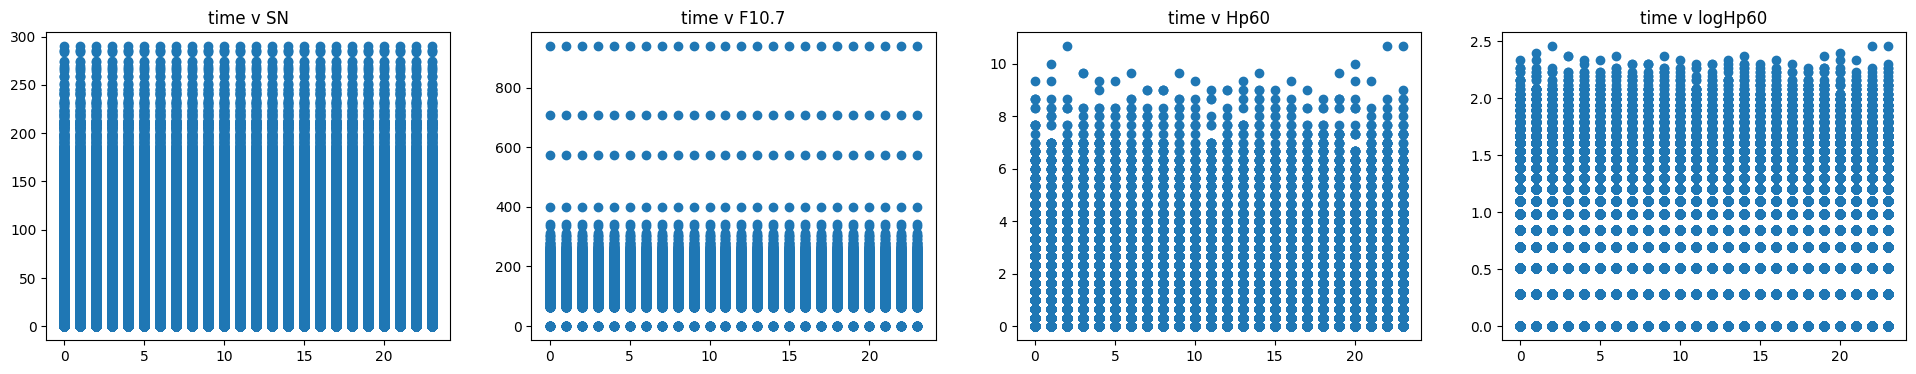

In [7]:
doc = pd.read_csv('./datasets_20y/dataset.csv')
# doc = doc.drop(columns= 'datatime')

data = doc.values
column_names = doc.columns
print(column_names)

data_reshaped = list(zip(*data))
# x = [int(int(j) for j in i.split('T')[0].split('-')) for i in data_reshaped[0]]
x = [int(i.split('T')[1].split(':')[0]) for i in data_reshaped[0]]
# print(x[3])


fig, ax = plt.subplots(1, 4, figsize=(24, 4))
for i_ls, ls in enumerate(data_reshaped):
    if i_ls == 0: continue
    ax[i_ls-1].set_title(f'time v {column_names[i_ls]}')
    ax[i_ls-1].scatter(x, ls)

In [24]:
data_list = data_reshaped[-2]
data_chunk = []
for i in range(len(data_list) - 24 - 6):
    data_chunk.append(np.mean(data_list[i: 24 + 6 + i]))
print('done')
    

done


Text(0.5, 1.0, 'Hp60 distribution')

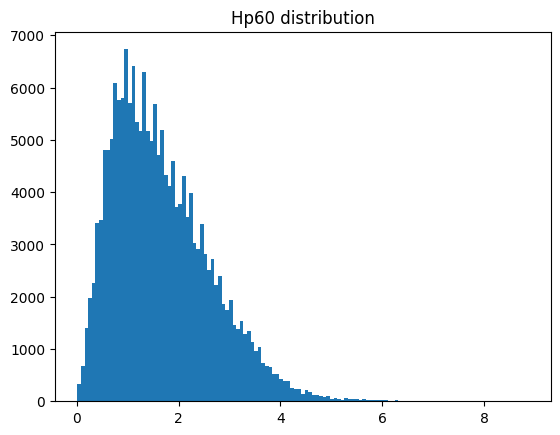

In [25]:
plt.hist(data_chunk, bins=125)
plt.title('Hp60 distribution')

Text(0.5, 1.0, 'Transformed Hp60 distribution - ln(x)')

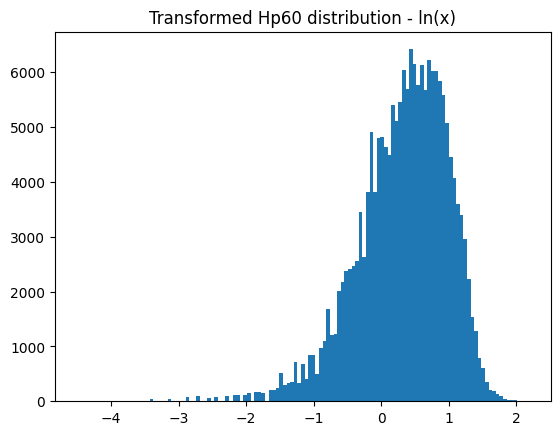

In [26]:
# data_chunk_log = np.log(data_chunk)
plt.hist(np.log(data_chunk), bins=125)
plt.title('Transformed Hp60 distribution - ln(x)')

Text(0.5, 1.0, 'Transformed Hp60 distribution - ln(x+1)')

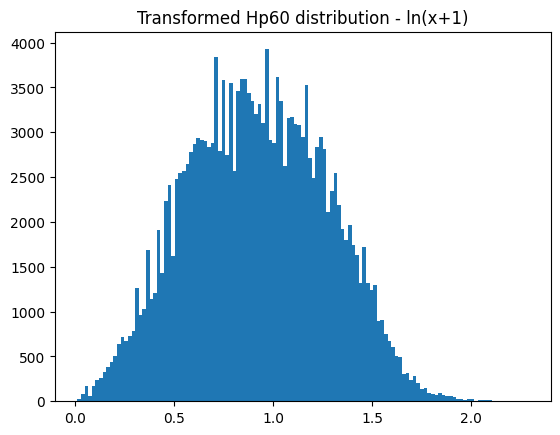

In [27]:
# data_chunk_log = np.log(data_chunk)
plt.hist(np.log(data_chunk + np.ones(len(data_chunk))), bins=125)
plt.title('Transformed Hp60 distribution - ln(x+1)')

[ 52  52  52 ... 179 179 179]
[[1.        0.8685268]
 [0.8685268 1.       ]]


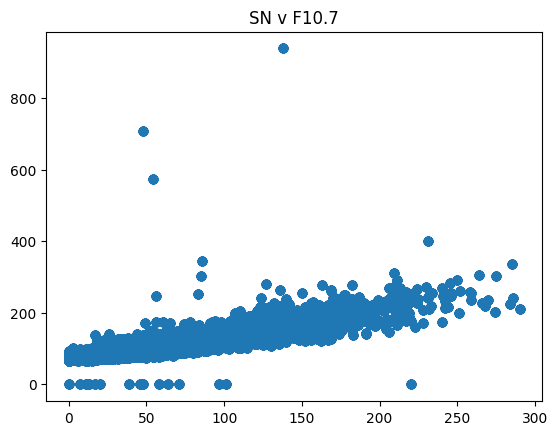

In [12]:
print(doc['SN'].values)
plt.scatter(doc['SN'].values, doc['F10.7'].values)
plt.title('SN v F10.7')

print(np.corrcoef(doc['SN'].values, doc['F10.7'].values))